# Regularized FEVD estimation
## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../')
sys.path.append('../../kungfu/')

import src
import kungfu as kf

/home/fbrun/.local/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## Load data

In [3]:
df_estimation_stats = pd.read_csv('../data/estimated/estimation_statistics.csv')
df_estimation_stats = df_estimation_stats.rename(columns={'Unnamed: 0': 'year'})
df_estimation_stats['year'] = pd.to_datetime(df_estimation_stats['year'])
df_estimation_stats = df_estimation_stats.set_index('year')

## Calculations

In [4]:
df_estimation_stats['mean_shrinkage'] = (df_estimation_stats['var_nonzero_shrinkage']+df_estimation_stats['covar_full_shrinkage'])/2
df_estimation_stats['cov_used_df'] = (df_estimation_stats['precision_density']*df_estimation_stats['N']**2-df_estimation_stats['N'])/2 + df_estimation_stats['N']
df_estimation_stats['var_regular_lost_df'] = df_estimation_stats['N']**2+df_estimation_stats['N']
df_estimation_stats['covar_regular_lost_df'] = (df_estimation_stats['N']*(df_estimation_stats['N']-1))/2
df_estimation_stats['var_estimate_share'] = df_estimation_stats['var_regular_lost_df']/(df_estimation_stats['var_regular_lost_df']+df_estimation_stats['covar_regular_lost_df'])
df_estimation_stats['mean_density'] = (df_estimation_stats['var_matrix_density']*df_estimation_stats['var_estimate_share']\
                                       +(1-df_estimation_stats['var_estimate_share'])*df_estimation_stats['precision_density'])

In [5]:
df_estimation_stats.mean().round(2).to_frame()

,0
T,251.83
N,100.00
nobs,25182.77
lambda,1.65
kappa,0.00
ini_lambda,0.04
ini_kappa,0.04
var_matrix_density,0.58
var_mean_connection,0.00
var_mean_abs_connection,0.02


## Plotting

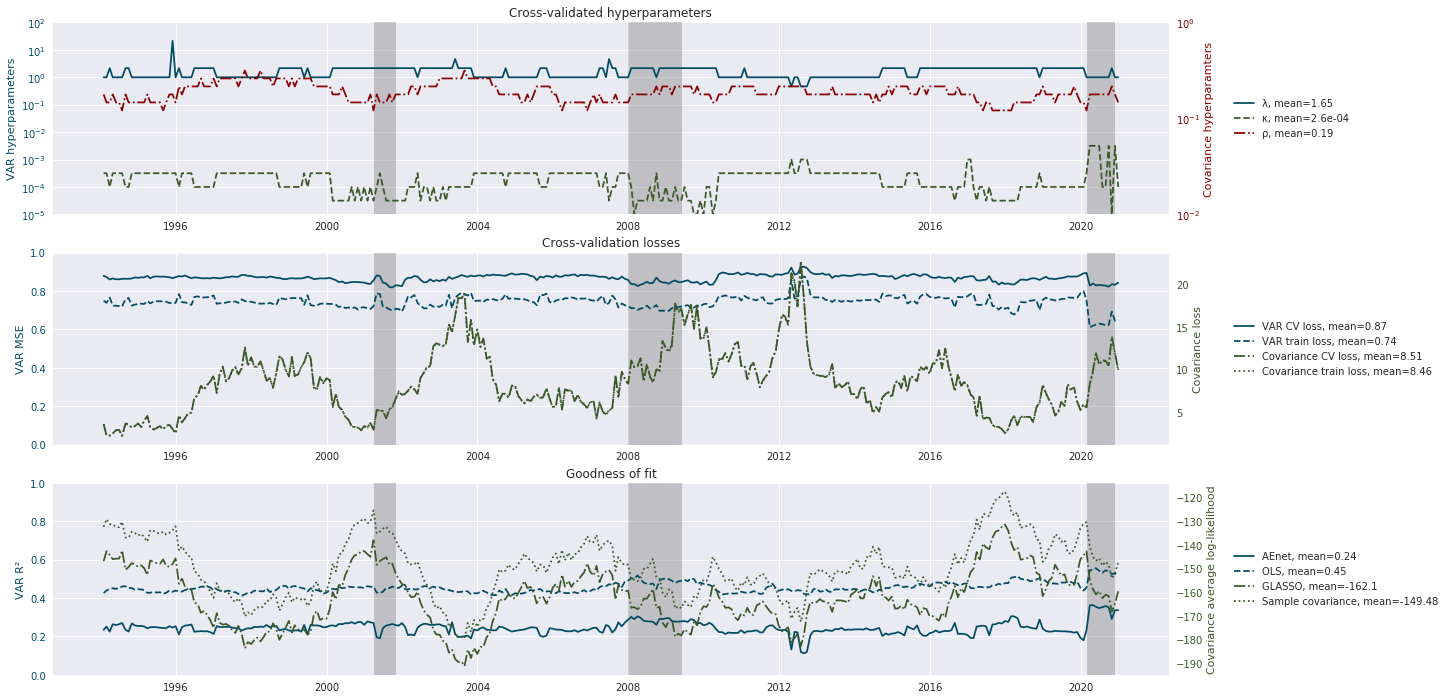

In [6]:
src.plot.plot_estimation_summary(df_estimation_stats, save_path='../reports/figures/estimation_summary.pdf')

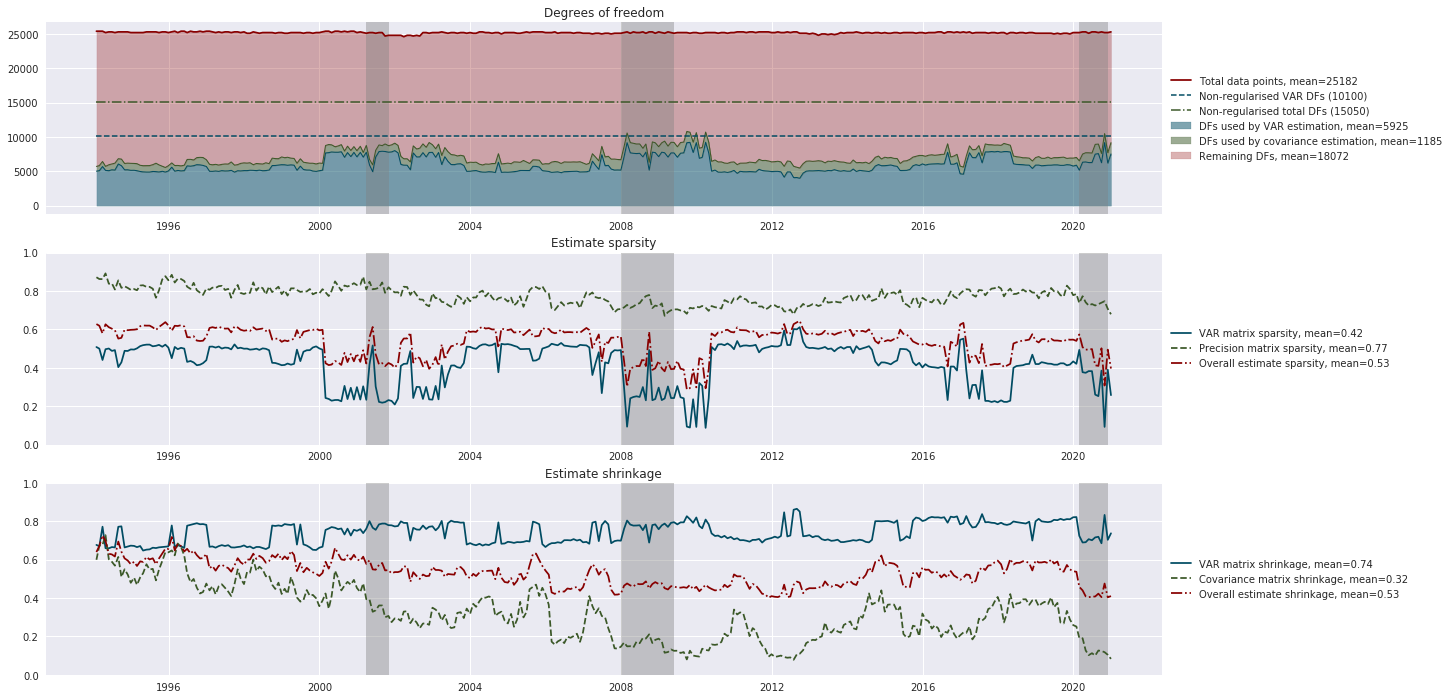

In [7]:
src.plot.plot_regularisation_summary(df_estimation_stats, save_path='../reports/figures/regularisation_summary.pdf')

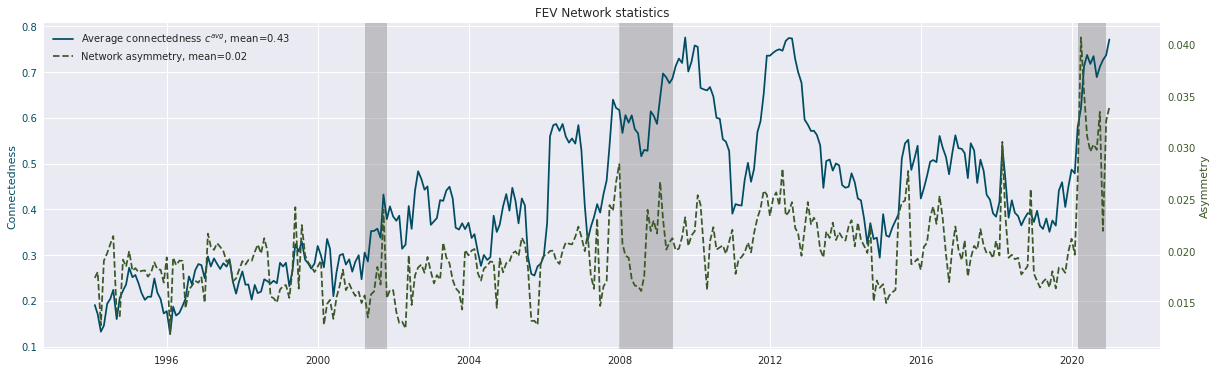

In [10]:
src.plot.plot_network_summary(df_estimation_stats, save_path='../reports/figures/network_summary.pdf')